In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
data=pd.read_csv('/content/archive (7).zip')

In [103]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [105]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [106]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [107]:
data['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [108]:
data['label'].unique

<bound method Series.unique of 0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object>

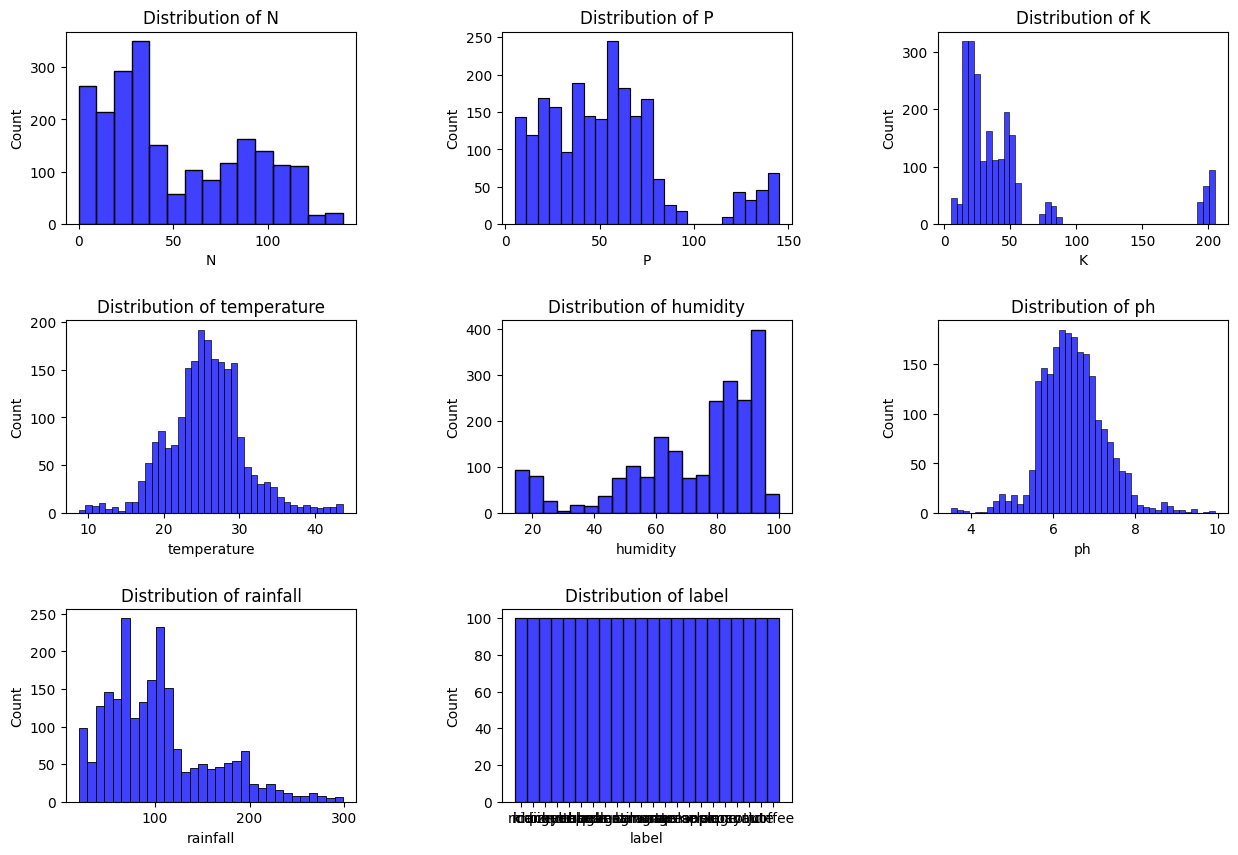

In [109]:
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

fig.subplots_adjust(hspace=0.5, wspace=0.5)

axes = axes.flatten()

for i, feature in enumerate(features):
    sns.histplot(data[feature], ax=axes[i], color='blue')
    axes[i].set_title(f'Distribution of {feature}')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

In [53]:
x=data.iloc[:,:-1]
y=data['label']

In [54]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [55]:
numeric_featurea=x.select_dtypes(include=['int64','float64']).columns
categorial_features=x.select_dtypes(include=['object']).columns

In [56]:
from types import SimpleNamespace
numeric_transform=Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
 ('scaler',MinMaxScaler())])
categorical_transform=Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
 ('encoder',OneHotEncoder())])

In [57]:
preprocessor=ColumnTransformer(transformers=[('num',numeric_transform,numeric_featurea),
                                            ('cat',categorical_transform,categorial_features)])

In [71]:
model= LogisticRegression(random_state=42)    # 92% accuracy
model2=RandomForestClassifier(random_state=42)  # 99% accuracy
model3=KNeighborsClassifier()  # 96% accuracy
model4=SVC() # 96% accuracy


In [99]:
model= LogisticRegression(random_state=42)
pipeline=Pipeline(steps=[('preprocessor',preprocessor),
                        ('model',model2)])  # idher se model change kerna h

In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
pipeline.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index([], dtype='object'))])),
                ('model', SVC())])

In [94]:
y_pred=pipeline.predict(x_test)

In [95]:
y_pred

array(['muskmelon', 'watermelon', 'papaya', 'papaya', 'apple', 'mango',
       'apple', 'mothbeans', 'mungbean', 'lentil', 'blackgram', 'coconut',
       'pomegranate', 'jute', 'coconut', 'pomegranate', 'apple', 'maize',
       'papaya', 'muskmelon', 'coffee', 'papaya', 'orange', 'papaya',
       'chickpea', 'jute', 'mungbean', 'orange', 'pigeonpeas', 'rice',
       'pomegranate', 'lentil', 'jute', 'lentil', 'jute', 'blackgram',
       'jute', 'chickpea', 'chickpea', 'kidneybeans', 'papaya', 'mango',
       'blackgram', 'maize', 'mungbean', 'maize', 'pigeonpeas', 'coconut',
       'muskmelon', 'maize', 'blackgram', 'coffee', 'grapes', 'mungbean',
       'coffee', 'kidneybeans', 'cotton', 'apple', 'banana', 'lentil',
       'watermelon', 'coconut', 'lentil', 'orange', 'papaya', 'blackgram',
       'orange', 'rice', 'muskmelon', 'pigeonpeas', 'muskmelon',
       'coconut', 'jute', 'banana', 'blackgram', 'papaya', 'banana',
       'cotton', 'watermelon', 'orange', 'coffee', 'chickpea', 'j

In [96]:
y_test


1451     muskmelon
1334    watermelon
1761        papaya
1735        papaya
1576         apple
           ...    
59            rice
71            rice
1908        cotton
1958        cotton
482     pigeonpeas
Name: label, Length: 440, dtype: object

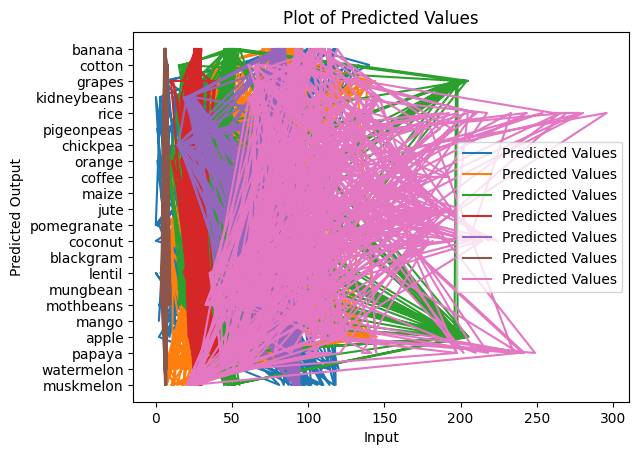

In [121]:
y_pred = pipeline.predict(x_test)  # Assuming one-dimensional input

# Plot the predicted values
plt.plot(x_test, y_pred, label='Predicted Values')
plt.xlabel('Input')
plt.ylabel('Predicted Output')
plt.title('Plot of Predicted Values')
plt.legend()
plt.show()

**Checking Accuracy**

In [97]:
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [98]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9681818181818181


In [91]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [80]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)


recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)


f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9931818181818182
Precision: 0.9937348484848485
Recall: 0.9931818181818182
F1-score: 0.9931754816901672
Confusion Matrix:
 [[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 

In [81]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

# **User Input Data**

In [82]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [83]:
import pandas as pd
from types import SimpleNamespace

def predict_from_user_input(model_pipeline):
    numeric_features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
    #categorical_features=['label']
    user_input = {}
    for feature in numeric_features:
        user_input[feature] = float(input(f"Enter value for {feature}: "))
    #for feature in categorical_features:
        #user_input[feature] = input(f"Enter value for {feature}: ")

    user_input_df = pd.DataFrame(user_input, index=[0])

    prediction = model_pipeline.predict(user_input_df)
    return prediction

predicted_label = predict_from_user_input(pipeline)
print(f"You should grow {predicted_label} in your field ")


Enter value for N: 90
Enter value for P: 42
Enter value for K: 43
Enter value for temperature: 20
Enter value for humidity: 80
Enter value for ph: 6.5
Enter value for rainfall: 202
You should grow ['rice'] in your field 
